In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from tqdm import tqdm
import time

import sys
print(sys.executable)

c:\Users\Justin\AppData\Local\Programs\Python\Python312\python.exe


In [3]:
# Read Cleaned Standarized Data (See main.ipynb)

df = pd.read_csv("Data/Clean_Standard_Data.csv")
df

,Support Calls,Total Spend,Contract Length_Monthly,Payment Delay,Age,Gender_Male,Gender_Female,Churn
0,0.053192,0.441055,-0.525226,-0.413769,0.260117,0.895850,-0.895850,0
1,0.053192,0.041446,-0.525226,0.887823,-0.608036,0.895850,-0.895850,1
2,-0.265930,-0.333698,-0.525226,0.177863,0.023348,0.895850,-0.895850,0
3,0.372313,0.534841,-0.525226,-1.360382,0.575809,0.895850,-0.895850,1
4,-0.265930,0.620472,-0.525226,-0.058790,0.260117,0.895850,-0.895850,0
...,...,...,...,...,...,...,...,...
449423,-0.265930,0.008824,-0.525226,-0.177116,0.733655,-1.116256,1.116256,0
449424,-0.265930,1.399303,-0.525226,0.651170,0.102271,-1.116256,1.116256,0
449425,-0.265930,-1.503983,-0.525226,0.532843,1.522885,-1.116256,1.116256,1
449426,-0.585051,1.109790,1.903938,1.479456,-0.923728,-1.116256,1.116256,1


In [4]:
# Shuffle and sample the dataset (downsample to 5000 examples)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df[:100000]
features = df[df.columns[:-1]]
target = df["Churn"]

X_temp, X_test, y_temp, y_test = train_test_split(features, target, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1)

In [ ]:
# Each of the following functions fits the optimized model and finds the F1 Score

In [5]:
from sklearn.tree import DecisionTreeClassifier

def d_tree():
    best_tree = DecisionTreeClassifier(max_depth=7)
    best_tree.fit(X_train, y_train)

    y_pred = best_tree.predict(X_test)
    report = (classification_report(y_test, y_pred, output_dict=True))
    return report["accuracy"]


In [6]:
from sklearn.neighbors import KNeighborsClassifier

def knn():
    best_knn = KNeighborsClassifier(n_neighbors=13)
    best_knn.fit(X_train, y_train)
    
    y_pred = best_knn.predict(X_test)
    report = (classification_report(y_test, y_pred, output_dict=True))
    return report["accuracy"]


In [7]:
from sklearn.svm import SVC

def svm():
    model = SVC(
        C=10,
        gamma=1,
        kernel="rbf"
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    report = (classification_report(y_test, y_pred, output_dict=True))
    return report["accuracy"]



In [8]:
from sklearn.neural_network import MLPClassifier

def mlp():
    mlp = MLPClassifier(
    hidden_layer_sizes=(100, 250, 250, 100), 
    max_iter=150, 
    learning_rate="adaptive", 
    solver="sgd", 
    random_state=42, 
    activation="relu", 
    alpha=0.01)

    mlp.fit(X_train, y_train)
    
    y_pred = mlp.predict(X_test)
    report = (classification_report(y_test, y_pred, output_dict=True))
    return report["accuracy"]

In [ ]:
d_tree_f1 = []
knn_f1 = []
svm_f1 = []
mlp_f1 = []

epochs = 10

# For each epoch
for i in range(epochs):

    # Randomly split the data
    X_temp, X_test, y_temp, y_test = train_test_split(features, target, test_size=0.1)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1)

   
    # Save the F1 using each optimized model
    d_tree_f1.append(d_tree())
    knn_f1.append(knn())
    svm_f1.append(svm())
    mlp_f1.append(mlp())

print(f"f1 Scores for Decision Tree: {d_tree_f1}")
print(f"f1 Scores for KNN: {knn_f1}")
print(f"f1 Scores for SVM: {svm_f1}")
print(f"f1 Scores for MLP: {mlp_f1}")

Loading…:   0%|                                     | 0/10 [00:00<?, ?it/s]c:\Users\Justin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
Loading…:  10%|██▌                       | 1/10 [08:39<1:17:57, 519.76s/it]c:\Users\Justin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
Loading…:  20%|█████▏                    | 2/10 [17:04<1:08:07, 510.98s/it]c:\Users\Justin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  w

f1 Scores for Decision Tree: [0.9213, 0.9152, 0.9128, 0.9169, 0.918, 0.9166, 0.9184, 0.9194, 0.9174, 0.9157]
f1 Scores for KNN: [0.91, 0.9029, 0.9017, 0.9042, 0.906, 0.9045, 0.9069, 0.907, 0.9078, 0.9049]
f1 Scores for SVM: [0.9167, 0.9099, 0.9081, 0.9107, 0.9104, 0.9089, 0.9125, 0.9124, 0.9138, 0.9112]
f1 Scores for MLP: [0.9217, 0.915, 0.9142, 0.9172, 0.917, 0.9152, 0.9178, 0.9188, 0.9185, 0.9159]


In [ ]:
import pandas as pd

# Create a df to easier plot data
df = pd.DataFrame(
    {"Decision Tree": d_tree_f1,
    "KNN": knn_f1,
    "Svm": svm_f1,
    "MLP" : mlp_f1}
)

df

,Decision Tree,KNN,Svm,MLP
0,0.9213,0.9100,0.9167,0.9217
1,0.9152,0.9029,0.9099,0.9150
2,0.9128,0.9017,0.9081,0.9142
3,0.9169,0.9042,0.9107,0.9172
4,0.9180,0.9060,0.9104,0.9170
5,0.9166,0.9045,0.9089,0.9152
6,0.9184,0.9069,0.9125,0.9178
7,0.9194,0.9070,0.9124,0.9188
8,0.9174,0.9078,0.9138,0.9185
9,0.9157,0.9049,0.9112,0.9159


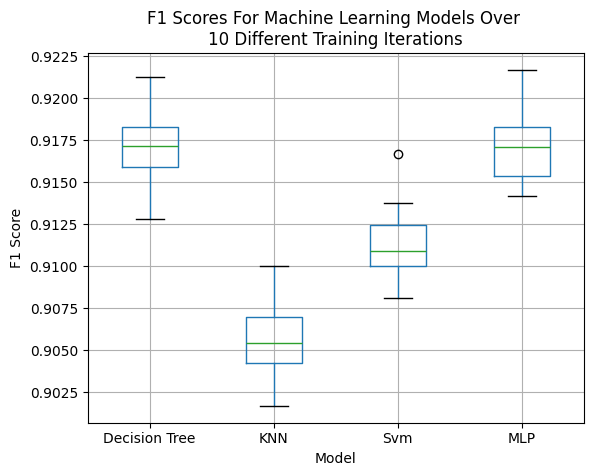

In [ ]:
# Create bot plox for F1 Scores

df.boxplot()
plt.title("F1 Scores For Machine Learning Models Over \n10 Different Training Iterations")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.show()

In [25]:
df.mean().sort_values(ascending=False)

Decision Tree    0.91717
MLP              0.91713
Svm              0.91146
KNN              0.90559
dtype: float64

In [ ]:
df.std().sort_values(ascending=False)

Decision Tree    0.002353
KNN              0.002453
Svm              0.002515
MLP              0.002221
dtype: float64